In [18]:
from api.core.integrations.nominatim import nominatim_address_search
import geopandas as gpd
from shapely.geometry import shape

In [15]:
#resp = nominatim_address_search('Rua Libero Badaró, 425')

Searching nominatim:  https://nominatim.openstreetmap.org/search?street=Rua Libero Badaró, 425&city=Sao Paulo&state=Sao Paulo&country=br&bounded=0&layer=address&format=geojson&accept-language=en-US&email=hpougy@prefeitura.sp.gov.br&addressdetails=1


In [16]:
resp

{'type': 'FeatureCollection',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright',
 'features': [{'type': 'Feature',
   'properties': {'place_id': 40252769,
    'osm_type': 'way',
    'osm_id': 425691648,
    'place_rank': 30,
    'category': 'building',
    'type': 'yes',
    'importance': 0.2533630197666373,
    'addresstype': 'building',
    'name': 'Grande São Paulo',
    'display_name': 'Grande São Paulo, 425, Rua Líbero Badaró, Glicério, Sé, São Paulo, Região Imediata de São Paulo, Região Metropolitana de São Paulo, Região Geográfica Intermediária de São Paulo, São Paulo, Southeast Region, 01009-000, Brazil',
    'address': {'building': 'Grande São Paulo',
     'house_number': '425',
     'road': 'Rua Líbero Badaró',
     'suburb': 'Glicério',
     'city': 'São Paulo',
     'municipality': 'Região Imediata de São Paulo',
     'county': 'Região Metropolitana de São Paulo',
     'state_district': 'Região Geográfica Intermediária de São Paulo',
     '

In [ ]:
resp

In [4]:
from api.core.integrations.geosampa import geosampa

In [11]:
y, x = -46.63642711761827, -23.546245499999998

In [12]:
from api.core.utils.geo import point_from_wgs_to_sirgas

In [13]:
x, y = point_from_wgs_to_sirgas(x, y)

In [19]:
dist = geosampa.point_within_pol('geoportal:distrito_municipal', x, y)

Requesting geosampa: http://wfs.geosampa.prefeitura.sp.gov.br/geoserver/ows/?service=WFS&version=1.0.0&request=GetFeature&outputFormat=application/json&exceptions=application/json&typeName=geoportal:distrito_municipal&cql_filter=DWITHIN(ge_poligono,POINT(332963.291032242 7395055.814473145),5,meters)


In [26]:
dist = dist['features'][0]

<AxesSubplot: >

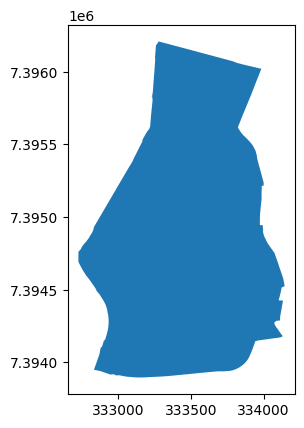

In [34]:
gpd.GeoDataFrame({'geometry':[shape(dist['geometry'])]}).plot()